In [17]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [18]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    strike_rate: float
    fours: int
    sixes: int
    bpb: float
    bp:float
    summary: str
    
    
    

In [19]:
def calculate_sr(state:BatsmanState):
    runs=state["runs"]
    balls=state["balls"]
    sr=0.0
    if balls==0:
        sr=0.0
    else:
        sr=(runs/balls)*100
        
    return {"strike_rate": sr}

In [20]:
def calculate_bp(state:BatsmanState):
    runs=state["runs"]
    balls=state["balls"]
    fours=state["fours"]
    sixes=state["sixes"]
    boundries_run=4*fours + 6*sixes
    bp=0.0
    if runs==0:
        bp=0.0
    else:
        bp=(boundries_run/runs)*100
    return {"bp": bp}

In [21]:
def calculate_bpb(state:BatsmanState)->BatsmanState:
    runs=state["runs"]
    balls=state["balls"]
    fours=state["fours"]
    sixes=state["sixes"]
    boundries=fours + sixes
    bpb=0.0
    if balls==0:
        bpb=0.0
    else:
        bpb=boundries/balls
    return {"bpb": bpb} 

In [22]:
def calculate_bp(state=BatsmanState)->BatsmanState:
    runs=state["runs"]
    balls=state["balls"]
    fours=state["fours"]
    sixes=state["sixes"]
    boundries_run=4*fours + 6*sixes
    if runs==0:
        state["bp"]=0.0
    else:
        state["bp"]=(boundries_run/runs)*100
    return state

In [ ]:
def summary(state:BatsmanState)->BatsmanState:
    summary_str=f"""Batsman Summary:
    Runs Scored: {state['runs']}
    Balls Faced: {state['balls']}
    Strike Rate: {state['strike_rate']:.2f}
    Boundaries per Ball: {state['bpb']:.2f}
    Boundary Percentage: {state['bp']:.2f}%
    """
    return {"summary": summary_str}

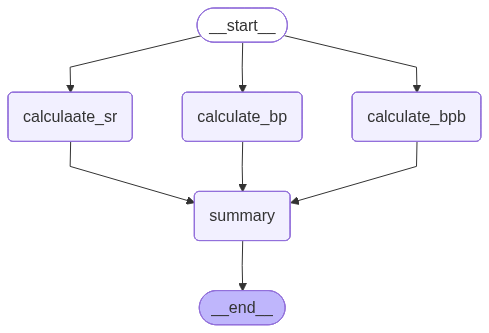

In [24]:
graph=StateGraph(BatsmanState)


graph.add_node("calculaate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_bp",calculate_bp)
graph.add_node("summary",summary)



graph.add_edge(START,"calculaate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_bp")


graph.add_edge("calculaate_sr","summary")
graph.add_edge("calculate_bpb","summary")
graph.add_edge("calculate_bp","summary")
graph.add_edge("summary",END)


workflow=graph.compile()

workflow

In [26]:
initial_state:BatsmanState={
    "runs":150,
    "balls":120,
    "fours":20,
    "sixes":5,
}


final_state=workflow.invoke(initial_state)

print(final_state["summary"])

Batsman Summary:
    Runs Scored: 150
    Balls Faced: 120
    Strike Rate: 125.00
    Boundaries per Ball: 0.21
    Boundary Percentage: 73.33%
    
